In [5]:
import numpy as np
from pymoo.problems import *
from pymoo.util.plotting import plot
from pymoo.util.ref_dirs import get_reference_directions
from pymoo.visualization.scatter import Scatter

In [3]:
x = np.random.rand(7)

The only difficulty provided by this problem is the convergence to the Pareto-optimal hyper-plane.

The search space contains (11^k−1) local Pareto-optimal fronts


In [16]:
def evaluate_DTLZ1(x, M=3):
    n = len(x)
    g = 100 * (n - M + 1 + sum((x[M-1:] - 0.5)**2 - np.cos(20 * np.pi * (x[M-1:] - 0.5))))
    f = np.zeros(M)
    for i in range(M):
        f[i] = 0.5 * (1 + g)
        for j in range(M - i - 1):
            f[i] *= x[j]
        if i != 0:
            f[i] *= (1 - x[M - i - 1])
    return f
def evaluate_DTLZ1(x, M=3):
    problem = get_problem("dtlz1", n_var=len(x), n_obj=M)
    return problem.evaluate(x)

M = 3
objective_values = evaluate_DTLZ1(x, M)
print("Objective values:", objective_values)

Objective values: [ 24.37471673  63.49939272 263.7867012 ]


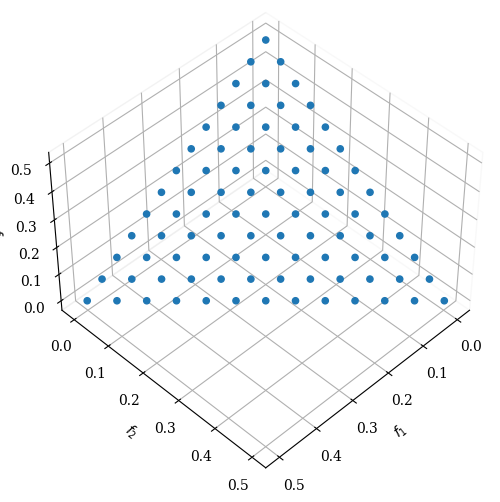

In [6]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
pf = get_problem("dtlz1").pareto_front(ref_dirs)
Scatter(angle=(45,45)).add(pf).show()

In [12]:
def evaluate_DTLZ2(x, M=3):
    n = len(x)
    k = n - M + 1
    g = sum((x[M-1:] - 0.5)**2)
    f = np.ones(M) * (1 + g)
    for i in range(M):
        for j in range(M - i - 1):
            f[i] *= np.cos(x[j] * np.pi / 2)
        if i != 0:
            f[i] *= np.sin(x[M - i - 1] * np.pi / 2)
    return f

M = 3
objective_values = evaluate_DTLZ2(x, M)
print("Objective values:", objective_values)

Objective values: [0.84097419 0.10066586 0.88045138]


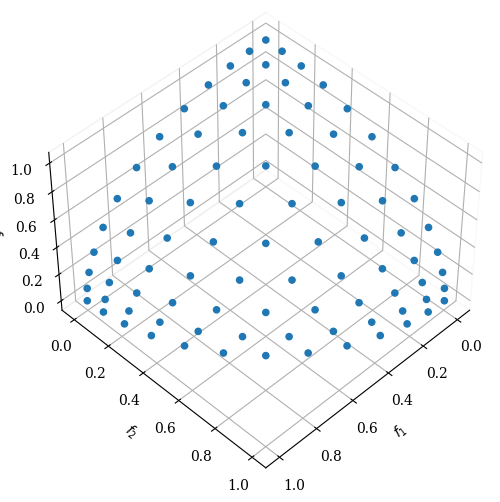

In [11]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
pf = get_problem("dtlz2").pareto_front(ref_dirs)
Scatter(angle=(45,45)).add(pf).show()

In [17]:
def evaluate_DTLZ3(x, M=3):
    n = len(x)
    k = n - M + 1
    g = 100 * (k + sum((x[M-1:] - 0.5)**2 - np.cos(20 * np.pi * (x[M-1:] - 0.5))))
    f = np.ones(M) * (1 + g)
    for i in range(M):
        for j in range(M - i - 1):
            f[i] *= np.cos(x[j] * np.pi / 2)
        if i != 0:
            f[i] *= np.sin(x[M - i - 1] * np.pi / 2)
    return f

M = 3
objective_values = evaluate_DTLZ3(x, M)
print("Objective values:", objective_values)

Objective values: [589.119993   274.26567038 269.03025643]


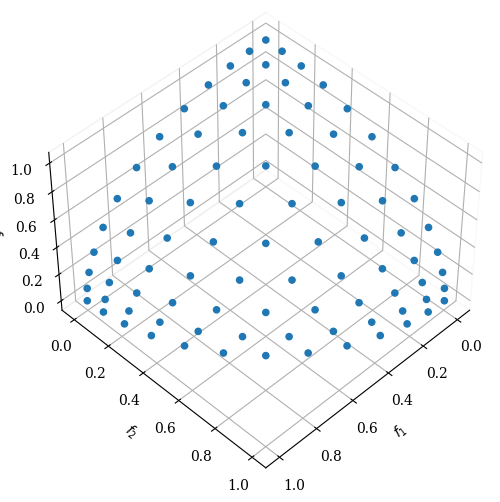

In [24]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
pf = get_problem("dtlz3").pareto_front(ref_dirs)
Scatter(angle=(45,45)).add(pf).show()

In [19]:
def evaluate_DTLZ4(x, M=3, alpha=100):
    n = len(x)
    k = n - M + 1
    g = sum((x[M-1:] - 0.5)**2)
    f = np.ones(M) * (1 + g)
    for i in range(M):
        for j in range(M - i - 1):
            f[i] *= np.cos((x[j]**alpha) * np.pi / 2)
        if i != 0:
            f[i] *= np.sin((x[M - i - 1]**alpha) * np.pi / 2)
    return f
M = 3
objective_values = evaluate_DTLZ4(x, M)
print("Objective values:", objective_values)

Objective values: [1.46275071e+00 4.66825147e-56 1.36454096e-60]


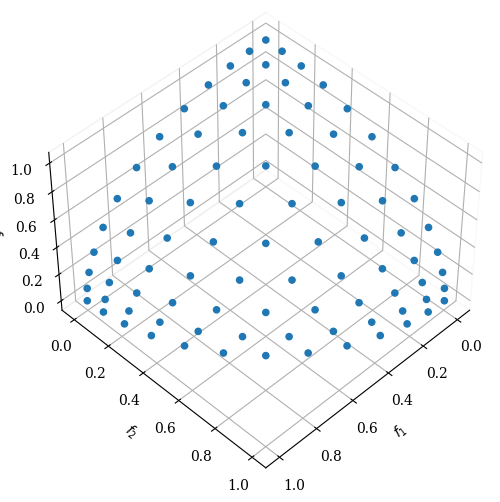

In [25]:
ref_dirs = get_reference_directions("das-dennis", 3, n_partitions=12)
pf = get_problem("dtlz4").pareto_front(ref_dirs)
Scatter(angle=(45,45)).add(pf).show()

In [26]:
def evaluate_DTLZ5(x, M=3):
    problem = get_problem("dtlz5", n_var=len(x), n_obj=M)
    return problem.evaluate(x)

M = 3  # Number of objectives
objective_values = evaluate_DTLZ5(x, M)
print("Objective values:", objective_values)

Objective values: [1.05532406 0.84431361 0.5595224 ]


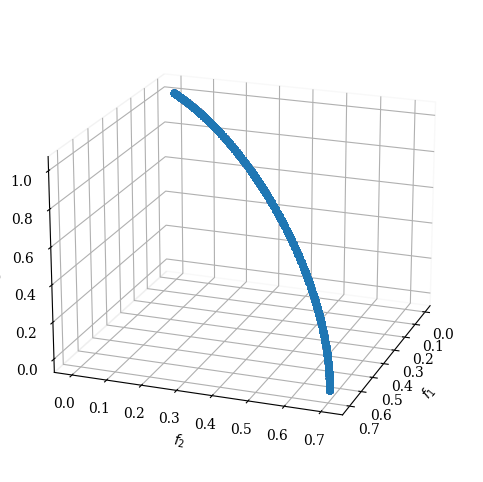

In [28]:
pf = get_problem("dtlz5").pareto_front()
Scatter(angle=(20,20)).add(pf).show()

In [29]:
def evaluate_DTLZ6(x, M=3):
    problem = get_problem("dtlz6", n_var=len(x), n_obj=M)
    return problem.evaluate(x)

M = 3  # Number of objectives
objective_values = evaluate_DTLZ6(x, M)
print("Objective values:", objective_values)

Objective values: [4.6276635  2.51058273 2.17962639]


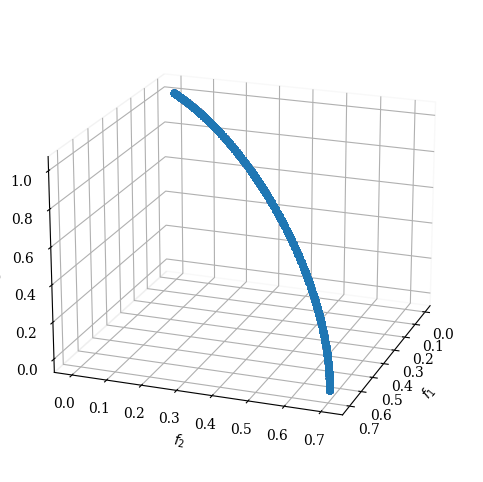

In [30]:
pf = get_problem("dtlz6").pareto_front()
Scatter(angle=(20,20)).add(pf).show()

In [44]:
def evaluate_DTLZ7(x, M=3):
    n = len(x)
    k = n - M + 1
    g = 1 + 9 / k * sum(x[M-1:])
    f = np.hstack((x[:M-1], [g]))
    h = M
    for i in range(M-1):
        h -= f[i] / (1 + g) * (1 + np.sin(3 * np.pi * f[i]))
    f[-1] = (1 + g) * h
    return f

M = 3
objective_values = evaluate_DTLZ7(x, M)
print("Objective values:", objective_values)

Objective values: [ 0.51233472  0.07584347 20.51657324]


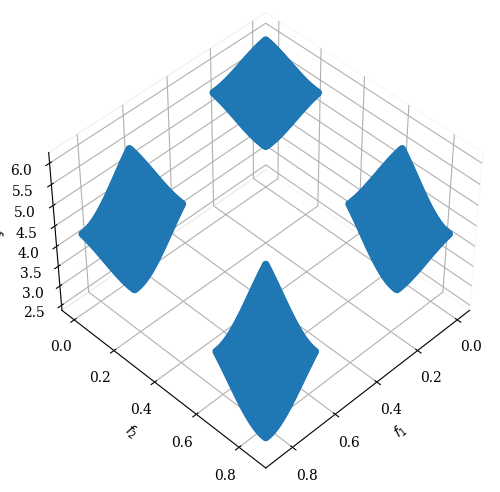

In [31]:
pf = get_problem("dtlz7").pareto_front()
Scatter(angle=(45,45)).add(pf).show()